In [47]:
import pickle
import numpy as np
import torch
from dnn import DNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import torch
from torch import nn
import matplotlib.pyplot as plt

Trained on 5 epochs with a batch size of 128. We used an input size of 10,000, with three hidden layers of size 256 each.
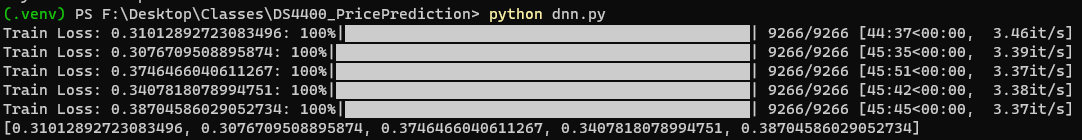

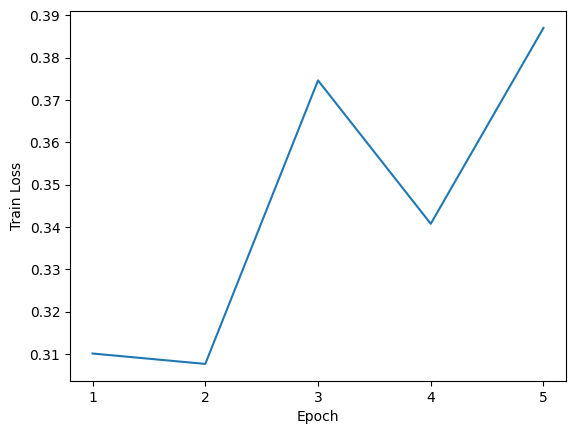

In [85]:
train_loss = [.31012892723083496, .3076709508895874, .3746466040611267, .3407818078994751, .38704586029052734]
plt.plot(train_loss)
plt.xticks(np.arange(5), np.arange(1, 6))
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.show()

In [77]:
with open('x_test_transformed.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    Y_test = pickle.load(f)


In [78]:
model = torch.load('dnn_model_10000_1.pt')

batch_x = torch.as_tensor(np.float32(X_test[:, :10000].todense()),
                          dtype=torch.float32)

dnn = DNN(layer_sizes=[10000, 256, 256, 256, 1])
dnn.load_state_dict(model)

<All keys matched successfully>

In [79]:
y_pred = dnn(batch_x)

class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))
    
criterion = RMSLELoss()
rmsle = criterion(y_pred, torch.as_tensor(np.float32(Y_test[:10000]), dtype=torch.float32))
print("Test RMSLE: ", float(rmsle))

Test RMSLE:  0.22026659548282623
